In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [257]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV

In [258]:
df = pd.read_csv(r'diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [259]:
df.shape

(768, 9)

In [260]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [261]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [262]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [263]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

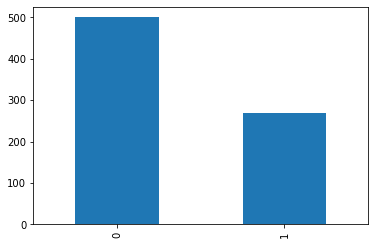

In [264]:
df['Outcome'].value_counts().plot(kind='bar')

In [265]:
df['BloodPressureSquare'] = np.square(df['BloodPressure'])
df['BloodPressurecube'] = df['BloodPressure'] ** 3
df['BloodPressureroot'] = np.sqrt(df['BloodPressure'])
df['GlucoseSquare'] = np.square(df['BloodPressure'])
df['Glucosecube'] = df['BloodPressure'] ** 3
df['Glucoseroot'] = np.sqrt(df['BloodPressure'])
df['GlucosePressure'] = df['BloodPressure'] * df['Glucose']
df['AgeBMI'] = df['Age'] * df['BMI']


In [266]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureSquare,BloodPressurecube,BloodPressureroot,GlucoseSquare,Glucosecube,Glucoseroot,GlucosePressure,AgeBMI
0,6,148,72,35,0,33.6,0.627,50,1,5184,373248,8.485281,5184,373248,8.485281,10656,1680.0
1,1,85,66,29,0,26.6,0.351,31,0,4356,287496,8.124038,4356,287496,8.124038,5610,824.6
2,8,183,64,0,0,23.3,0.672,32,1,4096,262144,8.000000,4096,262144,8.000000,11712,745.6
3,1,89,66,23,94,28.1,0.167,21,0,4356,287496,8.124038,4356,287496,8.124038,5874,590.1
4,0,137,40,35,168,43.1,2.288,33,1,1600,64000,6.324555,1600,64000,6.324555,5480,1422.3


In [267]:
categorical_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_columns

[]

In [268]:
numerical_colums = list(df._get_numeric_data().columns)
numerical_colums

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'BloodPressureSquare',
 'BloodPressurecube',
 'BloodPressureroot',
 'GlucoseSquare',
 'Glucosecube',
 'Glucoseroot',
 'GlucosePressure',
 'AgeBMI']

In [269]:
df[numerical_colums].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureSquare,BloodPressurecube,BloodPressureroot,GlucoseSquare,Glucosecube,Glucoseroot,GlucosePressure,AgeBMI
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.175320,0.176259,0.092836,0.175320,0.176259,0.092836,0.179732,0.464312
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.193076,0.199370,0.101355,0.193076,0.199370,0.101355,0.738652,0.320719
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.939331,0.853716,0.957905,0.939331,0.853716,0.957905,0.759888,0.333570
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.142755,0.100116,0.243681,0.142755,0.100116,0.243681,0.171366,0.121438
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.041168,0.015086,0.122710,0.041168,0.015086,0.122710,0.266606,0.068760
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.296674,0.288041,0.246327,0.296674,0.288041,0.246327,0.304900,0.578088
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.027483,0.017431,0.049532,0.027483,0.017431,0.049532,0.116078,0.097678
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.293206,0.296336,0.165789,0.293206,0.296336,0.165789,0.325094,0.809445
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.113143,0.128339,0.016052,0.113143,0.128339,0.016052,0.333256,0.357727
BloodPressureSquare,0.175320,0.193076,0.939331,0.142755,0.041168,0.296674,0.027483,0.293206,0.113143,1.000000,0.978555,0.804551,1.000000,0.978555,0.804551,0.752450,0.392396


In [270]:
k = 15
df[numerical_colums].corr().nlargest(k, 'Outcome')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureSquare,BloodPressurecube,BloodPressureroot,GlucoseSquare,Glucosecube,Glucoseroot,GlucosePressure,AgeBMI
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.113143,0.128339,0.016052,0.113143,0.128339,0.016052,0.333256,0.357727
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.193076,0.199370,0.101355,0.193076,0.199370,0.101355,0.738652,0.320719
AgeBMI,0.464312,0.320719,0.333570,0.121438,0.068760,0.578088,0.097678,0.809445,0.357727,0.392396,0.395474,0.250406,0.392396,0.395474,0.250406,0.415499,1.000000
GlucosePressure,0.179732,0.738652,0.759888,0.171366,0.266606,0.304900,0.116078,0.325094,0.333256,0.752450,0.704645,0.695453,0.752450,0.704645,0.695453,1.000000,0.415499
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.296674,0.288041,0.246327,0.296674,0.288041,0.246327,0.304900,0.578088
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.293206,0.296336,0.165789,0.293206,0.296336,0.165789,0.325094,0.809445
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.175320,0.176259,0.092836,0.175320,0.176259,0.092836,0.179732,0.464312
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.027483,0.017431,0.049532,0.027483,0.017431,0.049532,0.116078,0.097678
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.041168,0.015086,0.122710,0.041168,0.015086,0.122710,0.266606,0.068760
BloodPressurecube,0.176259,0.199370,0.853716,0.100116,0.015086,0.288041,0.017431,0.296336,0.128339,0.978555,1.000000,0.680148,0.978555,1.000000,0.680148,0.704645,0.395474


<AxesSubplot:>

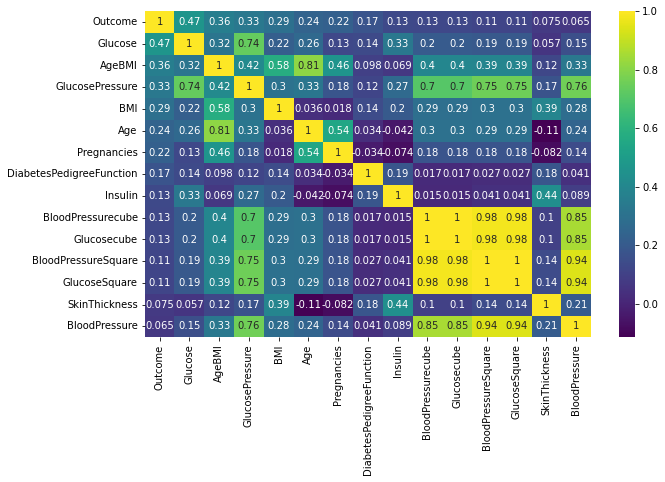

In [271]:
k =15

cols = df[numerical_colums].corr().nlargest(k, 'Outcome')['Outcome'].index

cm = df[cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [272]:
df[numerical_colums].corr().nlargest(k, 'Outcome')['Outcome']

Outcome                     1.000000
Glucose                     0.466581
AgeBMI                      0.357727
GlucosePressure             0.333256
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
BloodPressurecube           0.128339
Glucosecube                 0.128339
BloodPressureSquare         0.113143
GlucoseSquare               0.113143
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [273]:
cols


Index(['Outcome', 'Glucose', 'AgeBMI', 'GlucosePressure', 'BMI', 'Age',
       'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin',
       'BloodPressurecube', 'Glucosecube', 'BloodPressureSquare',
       'GlucoseSquare', 'SkinThickness', 'BloodPressure'],
      dtype='object')

In [274]:
cm

,Outcome,Glucose,AgeBMI,GlucosePressure,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,BloodPressurecube,Glucosecube,BloodPressureSquare,GlucoseSquare,SkinThickness,BloodPressure
Outcome,1.000000,0.466581,0.357727,0.333256,0.292695,0.238356,0.221898,0.173844,0.130548,0.128339,0.128339,0.113143,0.113143,0.074752,0.065068
Glucose,0.466581,1.000000,0.320719,0.738652,0.221071,0.263514,0.129459,0.137337,0.331357,0.199370,0.199370,0.193076,0.193076,0.057328,0.152590
AgeBMI,0.357727,0.320719,1.000000,0.415499,0.578088,0.809445,0.464312,0.097678,0.068760,0.395474,0.395474,0.392396,0.392396,0.121438,0.333570
GlucosePressure,0.333256,0.738652,0.415499,1.000000,0.304900,0.325094,0.179732,0.116078,0.266606,0.704645,0.704645,0.752450,0.752450,0.171366,0.759888
BMI,0.292695,0.221071,0.578088,0.304900,1.000000,0.036242,0.017683,0.140647,0.197859,0.288041,0.288041,0.296674,0.296674,0.392573,0.281805
Age,0.238356,0.263514,0.809445,0.325094,0.036242,1.000000,0.544341,0.033561,-0.042163,0.296336,0.296336,0.293206,0.293206,-0.113970,0.239528
Pregnancies,0.221898,0.129459,0.464312,0.179732,0.017683,0.544341,1.000000,-0.033523,-0.073535,0.176259,0.176259,0.175320,0.175320,-0.081672,0.141282
DiabetesPedigreeFunction,0.173844,0.137337,0.097678,0.116078,0.140647,0.033561,-0.033523,1.000000,0.185071,0.017431,0.017431,0.027483,0.027483,0.183928,0.041265
Insulin,0.130548,0.331357,0.068760,0.266606,0.197859,-0.042163,-0.073535,0.185071,1.000000,0.015086,0.015086,0.041168,0.041168,0.436783,0.088933
BloodPressurecube,0.128339,0.199370,0.395474,0.704645,0.288041,0.296336,0.176259,0.017431,0.015086,1.000000,1.000000,0.978555,0.978555,0.100116,0.853716


In [275]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureSquare,BloodPressurecube,BloodPressureroot,GlucoseSquare,Glucosecube,Glucoseroot,GlucosePressure,AgeBMI
0,6,148,72,35,0,33.6,0.627,50,1,5184,373248,8.485281,5184,373248,8.485281,10656,1680.0
1,1,85,66,29,0,26.6,0.351,31,0,4356,287496,8.124038,4356,287496,8.124038,5610,824.6
2,8,183,64,0,0,23.3,0.672,32,1,4096,262144,8.000000,4096,262144,8.000000,11712,745.6
3,1,89,66,23,94,28.1,0.167,21,0,4356,287496,8.124038,4356,287496,8.124038,5874,590.1
4,0,137,40,35,168,43.1,2.288,33,1,1600,64000,6.324555,1600,64000,6.324555,5480,1422.3


In [276]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [277]:
X = df.loc[:,df.columns != 'outcome']
y = df.loc[:, df.columns == target]

In [278]:
y.shape

(768, 1)

In [279]:
X.shape

(768, 17)

In [280]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [281]:
clf_lr = LogisticRegression()      
lr_baseline_model = clf_lr.fit(x_train,y_train)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [282]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['Outcome'],name='Actual')))
    return 1

In [283]:
generate_accuracy_and_heatmap(lr_baseline_model, x_test, y_test)

Accuracy is:  0.7480314960629921
F1 score is:  0.5949367088607594


Actual      0   1
Predicted        
0          40  23
1          14   8


1

In [284]:
from sklearn.feature_selection import SelectKBest, f_classif

In [285]:
select_feature1 = SelectKBest(score_func=f_classif, k=5).fit(x_train, y_train)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [286]:
select_feature1.scores_

array([1.87931138e+01, 1.45358256e+02, 1.46452061e+00, 3.89934201e+00,
       6.80479948e+00, 3.98587670e+01, 2.33242276e+01, 2.31785302e+01,
                  inf, 4.96231039e+00, 7.14077759e+00, 8.84460303e-02,
       4.96231039e+00, 7.14077759e+00, 8.84460303e-02, 5.84047881e+01,
       6.26042335e+01])

In [287]:
select_feature_df = pd.DataFrame({'Feature': list(x_train.columns),
                                 'Scores' : select_feature1.scores_})

select_feature_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
8,Outcome,inf
1,Glucose,145.358256
16,AgeBMI,62.604233
15,GlucosePressure,58.404788
5,BMI,39.858767
6,DiabetesPedigreeFunction,23.324228
7,Age,23.178530
0,Pregnancies,18.793114
10,BloodPressurecube,7.140778
13,Glucosecube,7.140778


In [288]:
x_train_annova = select_feature1.transform(x_train)
x_test_annova = select_feature1.transform(x_test)

In [289]:
x_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureSquare,BloodPressurecube,BloodPressureroot,GlucoseSquare,Glucosecube,Glucoseroot,GlucosePressure,AgeBMI
60,2,84,0,0,0,0.0,0.304,21,0,0,0,0.000000,0,0,0.000000,0,0.0
332,1,180,0,0,0,43.3,0.282,41,1,0,0,0.000000,0,0,0.000000,0,1775.3
421,2,94,68,18,76,26.0,0.561,21,0,4624,314432,8.246211,4624,314432,8.246211,6392,546.0


In [290]:
x_train_annova

array([[8.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.8000e+02, 4.3300e+01, 1.0000e+00, 0.0000e+00, 1.7753e+03],
       [9.4000e+01, 2.6000e+01, 0.0000e+00, 6.3920e+03, 5.4600e+02],
       ...,
       [1.5800e+02, 2.9800e+01, 0.0000e+00, 1.1060e+04, 1.8774e+03],
       [1.3000e+02, 2.5900e+01, 0.0000e+00, 9.1000e+03, 5.6980e+02],
       [1.3400e+02, 2.8900e+01, 1.0000e+00, 9.3800e+03, 6.6470e+02]])

In [291]:
lr_annova_model = clf_lr.fit(x_train_annova,y_train) # training model using those 5 features

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [292]:
generate_accuracy_and_heatmap(lr_annova_model, x_test_annova, y_test)

Accuracy is:  1.0
F1 score is:  1.0


Actual      0   1
Predicted        
0          34  19
1          20  12


1

In [293]:
from sklearn.feature_selection import SelectKBest, f_classif

In [294]:
rfe = RFE(estimator=clf_lr, step=1)
rfe = rfe.fit(x_train, y_train)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [295]:
rfe.ranking_

array([ 1,  1,  1,  1,  3,  8,  9,  1,  1,  6,  7,  1,  5, 10,  1,  4,  2])

In [296]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Ranking': rfe.ranking_})

selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Pregnancies,1
14,Glucoseroot,1
11,BloodPressureroot,1
7,Age,1
8,Outcome,1
3,SkinThickness,1
2,BloodPressure,1
1,Glucose,1
16,AgeBMI,2
4,Insulin,3


In [297]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [298]:
x_train_rfe[0:3]

array([[  2.        ,  84.        ,   0.        ,   0.        ,
         21.        ,   0.        ,   0.        ,   0.        ],
       [  1.        , 180.        ,   0.        ,   0.        ,
         41.        ,   1.        ,   0.        ,   0.        ],
       [  2.        ,  94.        ,  68.        ,  18.        ,
         21.        ,   0.        ,   8.24621125,   8.24621125]])

In [299]:
lr_rfe_model = clf_lr.fit(x_train_rfe,y_train)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [300]:
generate_accuracy_and_heatmap(lr_rfe_model, x_test_rfe, y_test)

Accuracy is:  1.0
F1 score is:  1.0


Actual      0   1
Predicted        
0          34  19
1          20  12


1

In [314]:
rfecv = RFECV(estimator=clf_lr, step =1, cv=7, scoring = 'accuracy')
rfecv = rfecv.fit(x_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Optimal number of features : 1
Best features : Index(['Outcome'], dtype='object')


C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [315]:
rfecv.grid_scores_

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.82432432, 1.        , 1.        , 1.        , 0.76712329,
        0.97260274, 1.        ],
       [1.        , 1.        , 1.        , 0.78082192, 0.75342466,
        0.89041096, 0.8

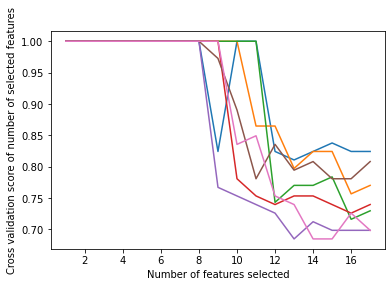

In [316]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [317]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [318]:
lr_clf_refcvmodel = clf_lr.fit(x_train_rfecv, y_train)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [319]:
generate_accuracy_and_heatmap(lr_clf_refcvmodel, x_test_rfecv, y_test)

Accuracy is:  1.0
F1 score is:  1.0


Actual      0   1
Predicted        
0          34  19
1          20  12


1